In [3]:
!pip install easyocr

     |████████████████████████████████| 70.8 MB 13 kB/s 
     |████████████████████████████████| 47.6 MB 1.3 MB/s 


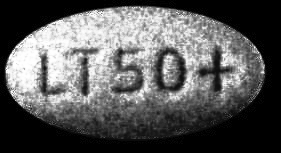

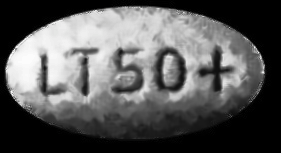

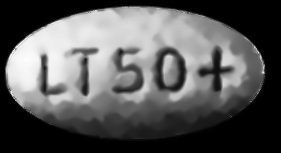

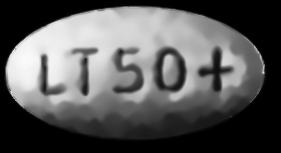

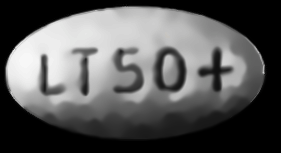

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


L50+


In [13]:
import cv2
import easyocr
import numpy as np
from google.colab.patches import cv2_imshow

'그레이 스케일'
def mtjin_bgr2gray(bgr_img):
    # BGR 색상값
    b = bgr_img[:, :, 0]
    g = bgr_img[:, :, 1]
    r = bgr_img[:, :, 2]
    result = ((0.299 * r) + (0.587 * g) + (0.114 * b))
    # imshow 는 CV_8UC3 이나 CV_8UC1 형식을 위한 함수이므로 타입변환
    return result.astype(np.uint8)

'히스토그램 평활화'
def histogram_equalization(img):
  src = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
  dst = cv2.equalizeHist(src)
  cv2_imshow(dst)
  cv2.imwrite("histogram_eq.jpg", dst)

 
'노이즈 제거'
def rm_noise(img):
  src = cv2.imread(img, cv2.IMREAD_COLOR)
  denoised_img = cv2.fastNlMeansDenoisingColored(src, None, 15, 15, 5, 10)
  #cv2_imshow(src)
  cv2_imshow(denoised_img)
  cv2.imwrite("denoise.jpg", denoised_img)

def ocr(img):
  reader = easyocr.Reader(['ko', 'en'])
  result = reader.readtext(img, detail = 0)
  joined_str = "".join(result) 
  print(joined_str)

def main():
  input_img = cv2.imread("/content/타원-removebg-preview.png", cv2.IMREAD_COLOR) #이미지 경로 변경
  bgr_img = mtjin_bgr2gray(input_img)
  #cv2_imshow(bgr_img)
  cv2.imwrite("gray.jpg", bgr_img)
  histogram_equalization("/content/gray.jpg")
  rm_noise("/content/histogram_eq.jpg")
  rm_noise("/content/denoise.jpg")
  rm_noise("/content/denoise.jpg")
  rm_noise("/content/denoise.jpg")
  ocr("/content/denoise.jpg")

if __name__ == "__main__":
	  main()